## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score,roc_auc_score
import joblib  # To save the model
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/Test OCBC

/content/drive/My Drive/Test OCBC


The first stage is to import several libraries and read the data. You can upload data directly to Google Colab or mount it to your drive.

In [ ]:
import re
cleaned_data = []
with open("dataset.csv", "r", encoding="utf-8") as file:
    for line in file:
        line = line.strip()
        line = re.sub(r'^"|"$', '', line)
        line = re.sub(r'""', '"', line)
        cleaned_data.append(line)

cleaned_file_path = "cleaned_dataset.csv"
with open(cleaned_file_path, "w", encoding="utf-8", newline="") as file:
    file.write("\n".join(cleaned_data))

df_final = pd.read_csv(cleaned_file_path, delimiter=",", engine="python")

df_final.head()

,index,flag_bad,de_age,de_gender,de_date_joined,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,...,de_children,ph_total_contacts,ph_other_device_info,ph_call_log_stats,ph_country_code,ph_app_list,fb_gender,fb_dob,fb_last_updated_date,fb_relation
0,0,0,26,1,08/04/2018 14:50,2535,3000000,1,51,4,...,0,66,"{""device_codename"": ""HM2014817"", ""brand"": ""Xia...","{""percent_incoming_nighttime"": 1.83, ""percent_...",id,"['com.google.android.music', 'com.facebook.orc...",male,11/23/1991,2017-12-21T04:38:00+0000,Married
1,1,0,22,1,02/01/2018 17:17,685,4000000,1,28,4,...,0,69,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.google.android.instantapps.supervisor', ...",male,01/20/1995,2017-11-25T17:23:09+0000,NaN
2,2,1,32,1,01/01/2018 16:39,1765,7000000,1,35,4,...,2,315,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 6.65, ""percent_...",id,"['com.tencent.ibg.joox', 'com.mrgames.larvaact...",male,10/13/1985,2017-12-23T18:05:57+0000,Married
3,3,0,31,2,04/01/2018 22:36,407,20000000,3,37,4,...,2,84,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.kfit.fave', 'app.bpjs.mobile', 'com.redd...",female,07/27/1986,2017-12-05T09:37:19+0000,Married
4,4,0,27,1,02/01/2018 18:12,3064,3000000,1,36,4,...,0,0,"{""device_codename"": ""1609"", ""brand"": ""vivo""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.lenovo.anyshare.gps', 'com.UCMobile.intl...",male,07/05/1990,2017-12-03T09:09:48+0000,In a relationship


Need to preprocess the file because of improper quotation marks inside the CSV file and the CSV also has inconsistent delimiters or extra embedded commas.

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41022 entries, 0 to 41021
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   41022 non-null  int64 
 1   flag_bad                41022 non-null  int64 
 2   de_age                  41022 non-null  int64 
 3   de_gender               41022 non-null  int64 
 4   de_date_joined          41022 non-null  object
 5   de_num_friends          41022 non-null  int64 
 6   de_monthly_salary       41022 non-null  int64 
 7   de_employment_type      41022 non-null  int64 
 8   de_employment_duration  41022 non-null  int64 
 9   de_accomodation_type    41022 non-null  int64 
 10  de_education            41022 non-null  int64 
 11  de_marital_status       41022 non-null  int64 
 12  de_children             41022 non-null  int64 
 13  ph_total_contacts       41022 non-null  int64 
 14  ph_other_device_info    41022 non-null  object
 15  ph

The dataset tconsists of 41,022 entries with 21 columns. There are 6 columns with missing values, which are: ph_call_log_stats,ph_country_code, fb_gender, fb_dob, fb_last_updated_date, fb_relation

## EDA

In [ ]:
categorical_columns = ['flag_bad','de_gender','de_employment_type','de_education','de_marital_status','ph_other_device_info','ph_call_log_stats',
                       'ph_country_code','ph_app_list','fb_gender','fb_dob','fb_relation','de_accomodation_type']
numerical_columns = list(set(df_final.columns) - set(categorical_columns))

### EDA Catgeorical Variables

In [ ]:
for column in categorical_columns:
  print(column)
  display(df_final[column].value_counts())

flag_bad


,count
flag_bad,
0,35702
1,5320


de_gender


,count
de_gender,
1,25086
2,15936


de_employment_type


,count
de_employment_type,
1,29566
2,6621
3,4833
4,2


de_education


,count
de_education,
2,24589
4,8258
3,5758
5,1561
1,856


de_marital_status


,count
de_marital_status,
1,20154
2,20020
3,500
4,348


ph_other_device_info


,count
ph_other_device_info,
"{""device_codename"": ""mido"", ""brand"": ""xiaomi""}",1871
"{""device_codename"": ""santoni"", ""brand"": ""Xiaomi""}",1832
"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}",1628
"{""device_codename"": ""rolex"", ""brand"": ""Xiaomi""}",1536
"{""device_codename"": ""A37f"", ""brand"": ""OPPO""}",1413
...,...
"{""device_codename"": ""ghost"", ""brand"": ""motorola""}",1
"{""device_codename"": ""X8 Pro"", ""brand"": ""alps""}",1
"{""device_codename"": ""c7ltechn"", ""brand"": ""samsung""}",1


ph_call_log_stats


,count
ph_call_log_stats,
"{""percent_incoming_nighttime"": 0.0, ""percent_outgoing_daytime"": 0.0, ""duration_incoming_daytime"": 0, ""duration_outgoing_daytime"": 0, ""percent_incoming_daytime"": 0.0, ""percent_other_calls"": 0.0, ""duration_outgoing_nighttime"": 0, ""percent_outgoing_nighttime"": 0.0, ""total_calls"": 0, ""duration_incoming_nighttime"": 0}",1308
"{""percent_incoming_nighttime"": 0.0, ""percent_outgoing_daytime"": 100.0, ""duration_incoming_daytime"": 0, ""duration_outgoing_daytime"": 0, ""percent_incoming_daytime"": 0.0, ""percent_other_calls"": 0.0, ""duration_outgoing_nighttime"": 0, ""percent_outgoing_nighttime"": 0.0, ""total_calls"": 1, ""duration_incoming_nighttime"": 0}",185
"{""percent_incoming_nighttime"": 0.0, ""percent_outgoing_daytime"": 0.0, ""duration_incoming_daytime"": 0, ""duration_outgoing_daytime"": 0, ""percent_incoming_daytime"": 0.0, ""percent_other_calls"": 100.0, ""duration_outgoing_nighttime"": 0, ""percent_outgoing_nighttime"": 0.0, ""total_calls"": 1, ""duration_incoming_nighttime"": 0}",120
"{""percent_incoming_nighttime"": 0.0, ""percent_outgoing_daytime"": 0.0, ""duration_incoming_daytime"": 0, ""duration_outgoing_daytime"": 0, ""percent_incoming_daytime"": 0.0, ""percent_other_calls"": 0.0, ""duration_outgoing_nighttime"": 0, ""percent_outgoing_nighttime"": 100.0, ""total_calls"": 1, ""duration_incoming_nighttime"": 0}",85
"{""percent_incoming_nighttime"": 0.0, ""percent_outgoing_daytime"": 100.0, ""duration_incoming_daytime"": 0, ""duration_outgoing_daytime"": 0, ""percent_incoming_daytime"": 0.0, ""percent_other_calls"": 0.0, ""duration_outgoing_nighttime"": 0, ""percent_outgoing_nighttime"": 0.0, ""total_calls"": 2, ""duration_incoming_nighttime"": 0}",78
...,...
"{""percent_incoming_nighttime"": 0.45, ""percent_outgoing_daytime"": 57.17, ""duration_incoming_daytime"": 11048, ""duration_outgoing_daytime"": 9594, ""percent_incoming_daytime"": 26.91, ""percent_other_calls"": 7.85, ""duration_outgoing_nighttime"": 1721, ""percent_outgoing_nighttime"": 7.62, ""total_calls"": 446, ""duration_incoming_nighttime"": 61}",1
"{""percent_incoming_nighttime"": 11.02, ""percent_outgoing_daytime"": 26.94, ""duration_incoming_daytime"": 6668, ""duration_outgoing_daytime"": 5296, ""percent_incoming_daytime"": 4.9, ""percent_other_calls"": 19.59, ""duration_outgoing_nighttime"": 10638, ""percent_outgoing_nighttime"": 37.55, ""total_calls"": 245, ""duration_incoming_nighttime"": 16366}",1
"{""percent_incoming_nighttime"": 17.05, ""percent_outgoing_daytime"": 21.59, ""duration_incoming_daytime"": 3193, ""duration_outgoing_daytime"": 1707, ""percent_incoming_daytime"": 20.45, ""percent_other_calls"": 18.18, ""duration_outgoing_nighttime"": 1843, ""percent_outgoing_nighttime"": 22.73, ""total_calls"": 88, ""duration_incoming_nighttime"": 3128}",1


ph_country_code


,count
ph_country_code,
id,40984
us,3
sg,3
my,2
jp,2
tw,1
kh,1
th,1


ph_app_list


,count
ph_app_list,
[],913
"['com.finaccel.android', 'com.whatsapp']",6
['com.finaccel.android'],5
"['com.whatsapp', 'com.finaccel.android', 'com.samsung.updatecarriermatch', 'com.google.android.instantapps.supervisor']",2
"['com.whatsapp', 'com.finaccel.android']",2
...,...
"['org.videolan.vlc', 'com.jocelyn.eva', 'com.swiftkey.languageprovider', 'com.handycloset.android.eraser', 'com.miui.enbbs', 'com.DynamicGames.HeavyTruckSimulator', 'com.gamestar.pianoperfect', 'net.zedge.android', 'com.facebook.orca', 'com.mi.global.bbs', 'com.fts.pes18_by_herman_aja', 'com.lazada.android', 'com.picsart.studio', 'com.android.browser', 'com.rev.plugin.guitar.distortion', 'com.shinycore.picsaypro', 'br.com.rodrigokolb.realdrum', 'com.nemo.vidmate', 'com.rev.plugin.keyboards.elepiano', 'com.supercell.clashofclans', 'com.touchtype.swiftkey', 'com.google.android.inputmethod.pinyin', 'com.bukalapak.android', 'mobi.infolife.ezweather.locker.gun_shooting', 'com.rarlab.rar', 'com.nexstreaming.app.kinemasterfree', 'com.bbm', 'com.rev.plugin.keyborad.spacevoice', 'com.swiftkey.swiftkeyconfigurator', 'io.silvrr.installment', 'com.duokan.phone.remotecontroller', 'com.instagram.android', 'com.moreshare.chord.guitar.full.offline', 'com.completelearnguitarkeys.rohmatdigital.wallpaper', 'com.opera.mini.native', 'com.miui.android.fashiongallery', 'com.google.android.apps.youtube.mango', 'com.lenovo.anyshare.gps', 'com.maleo.bussimulatorid', 'com.mfashiongallery.emag', 'com.UCMobile.intl', 'com.andromo.dev445584.app545102', 'io.moonlighting.painnt', 'kr.kkh.image_search2', 'com.jrinnovation.proguitartuner', 'com.google.android.instantapps.supervisor', 'com.rev.plugin.keyboards.yamahap200', 'com.whatsapp', 'com.ivc.starprint', 'com.facebook.katana', 'com.google.android.play.games', 'com.shopee.id', 'com.imaginstudio.imagetools.pixellab', 'com.xiaomi.ab', 'com.sofeh.android.musicstudio3', 'com.finaccel.android', 'com.neuralprisma']",1
"['com.grabtaxi.passenger', 'com.srin.garut', 'com.samsung.concierge', 'com.vsco.cam', 'jp.naver.line.android', 'com.shopee.id', 'com.apps.MyXL', 'com.canva.editor', 'com.lenovo.anyshare.gps', 'src.com.bni', 'com.balysv.loop', 'blibli.mobile.commerce', 'com.popularapp.videodownloaderforinstagram', 'com.zalora.android', 'com.traveloka.android', 'com.king.candycrushsaga', 'com.sec.android.easyMover', 'com.kaskus.android', 'com.google.android.instantapps.supervisor', 'com.bhn.krl', 'com.tokopedia.tkpd', 'id.co.bni.sms', 'com.picsart.studio', 'com.bitsmedia.android.muslimpro', 'loseweight.weightloss.workout.fitness', 'com.waze', 'wp.wattpad', 'com.finaccel.android', 'com.google.android.apps.translate', 'com.srin.indramayu', 'com.pinterest', 'com.twitter.android', 'app.bpjs.mobile', 'com.spotify.music', 'com.gojek.app', 'com.berniiiiiiii.tekatekisilang']",1
"['com.lbe.parallel.intl', 'io.silvrr.installment', 'com.infobca', 'com.lge.sizechangable.weather', 'com.gameloft.android.ANMP.GloftM5HM', 'com.universallauncher.universallauncher', 'com.erega74.annabelleui.iconpack', 'com.themezilla.pixelui', 'com.tokopedia.tkpd', 'com.lge.themepark.theme_20151013120930', 'com.breel.wallpapers', 'com.miniclip.eightballpool', 'com.whatsapp', 'com.UCMobile.intl', 'com.telkomsel.telkomselcm', 'com.google.android.apps.translate', 'com.app.tokobagus.betterb', 'com.andi.alquran.id', 'com.lge.qremote', 'com.ea.games.r3_row', 'com.lge.qmemoplus', 'com.vipdiskon.doorway', 'com.youmusic.magictiles', 'com.rsupport.rs.activity.lge', 'com.waze', 'com.bca', 'com.smule.singandroid', 'com.gojek.app', 'com.lge.wernicke.nlp', 'com.lge.sizechangable.weather.theme.optimus', 'com.lenovo.anyshare.gps', 'com.loopsie.android', 'com.lge.theme.g6ux6', 'com.instagram.android', 'com.lge.cammra', 'com.lge.fmradio', 'com.finaccel.android', 'com.tommasoberlose.anotherwidget', 'com.lge.qvoiceplus', 'cm.aptoide.pt', 'com.lge.lgworld', 'com.bukalapak.android', 'com.lbe.parallel.intl.arm64', 'com.lge.mtalk.sf', 'com.gameloft.android.ANMP.GloftNOHM', 'noi.mandiri.emoney', 'com.mob

fb_gender


,count
fb_gender,
male,24013
female,15496


fb_dob


,count
fb_dob,
08/17/1945,29
01/01/1993,25
10/10/1990,21
01/01/1992,21
01/01/1994,20
...,...
05/25/1977,1
01/25/1966,1
06/22/1919,1


fb_relation


,count
fb_relation,
Married,6327
Single,4495
In a relationship,1847
Engaged,812
It's complicated,362
In an open relationship,158
Married (Pending),154
In a domestic partnership,118
Separated,110


de_accomodation_type


,count
de_accomodation_type,
4,41022


#### Count Plot

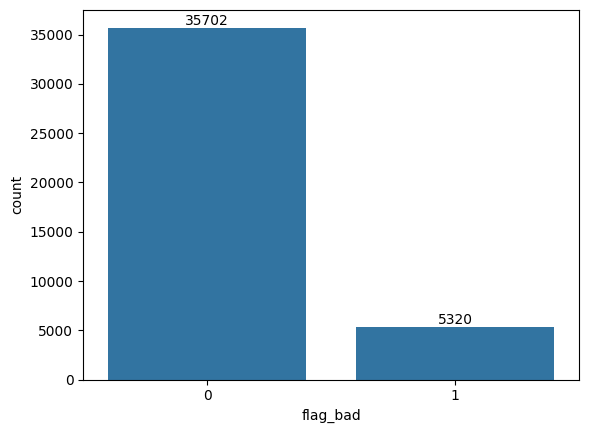

In [ ]:
ax = sns.countplot(x='flag_bad', data=df_final)
ax.bar_label(ax.containers[0])

plt.show()

* Good Users **Outnumber** Bad Users: There are **significantly more** good users (35,702) (87%) compared to bad users (5,320) (13%).

* **Ratio** of Good to Bad Users: This means that for every bad user, there are approximately **6.7 good users**.

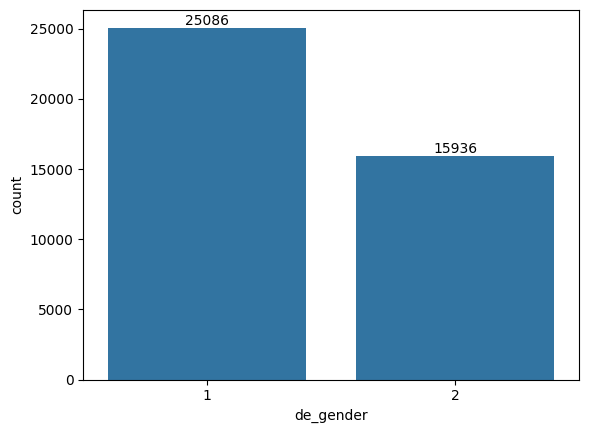

In [ ]:
ax = sns.countplot(x='de_gender', data=df_final)
ax.bar_label(ax.containers[0])

plt.show()

* Higher Male Count: The bar chart indicates that the count of males (25,086) is **higher than** the count of females (15,936).

* Distribution of Gender:

  * The dataset has a **significantly larger number** of males compared to females.

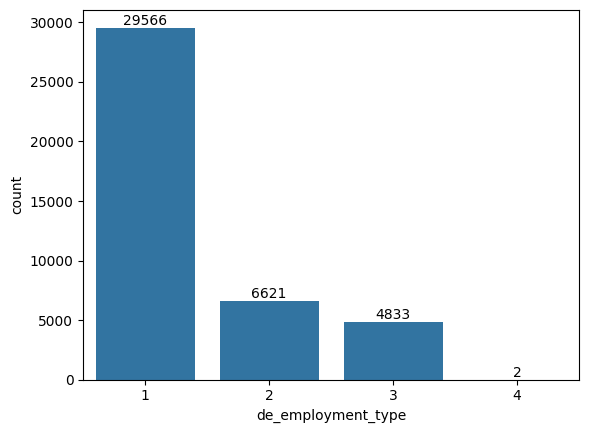

In [ ]:
ax = sns.countplot(x='de_employment_type', data=df_final)
ax.bar_label(ax.containers[0])

plt.show()

* Full-time Employment Dominates: The **majority of individuals are employed full-time** (29,566), significantly outnumbering part-time employees and business owners.

* Distribution of Employment Types:

  * Part-time employees (6,621) make up the second-largest group.

  * Business owners (4,833) are the smallest group among the specified employment types.

  * Minor Unspecified Category: There is a negligible count (2) for an unspecified employment type, which might be an anomaly or error in data.

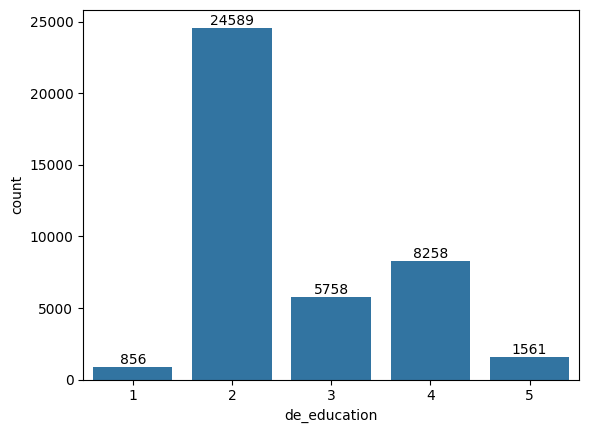

In [ ]:
ax = sns.countplot(x='de_education', data=df_final)
ax.bar_label(ax.containers[0])

plt.show()

* Senior High School Dominates: The **majority of individuals have completed senior high school** (24,589), **significantly outnumbering** the other education levels.

* Distribution of Education Levels:

  * The second-largest group is those with an undergraduate degree (8,258).

  * Diploma holders (5,758) come next.

  * Postgraduate education (1,561) has a relatively smaller count.

  * The smallest group is those who have completed only elementary school (856).

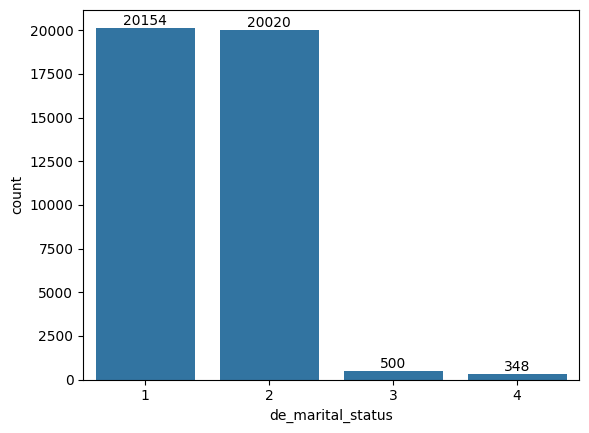

In [ ]:
ax = sns.countplot(x='de_marital_status', data=df_final)
ax.bar_label(ax.containers[0])

plt.show()

* Almost **Equal Distribution** between Single and Married: The number of single individuals (20,154) is **almost equal** to the number of married individuals (20,020).

* Small Numbers for Divorced and Widow/Widower:

  * There are relatively few individuals who are divorced (500).

  * The widow/widower category (348) has the smallest count.

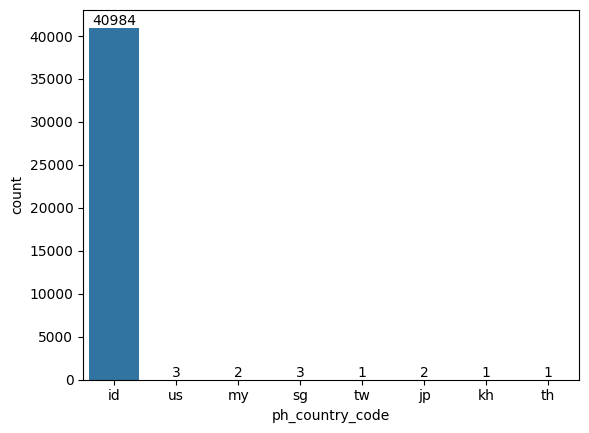

In [ ]:
ax = sns.countplot(x='ph_country_code', data=df_final)
ax.bar_label(ax.containers[0])

plt.show()

* **Dominance of ID** Country Code: The "id" country code has an overwhelming count of 40,984, making it the most frequent by far.

* Sparse Representation of Other Country Codes:

  * The "us" and "sg" country codes each have a count of 3.

  * The "my" and "jp" country codes each have a count of 2.

  * The "tw," "kh," and "th" country codes each have a count of 1.

**We can ignore** this feature in modelling due to **very dominant** of a category compared to other categories

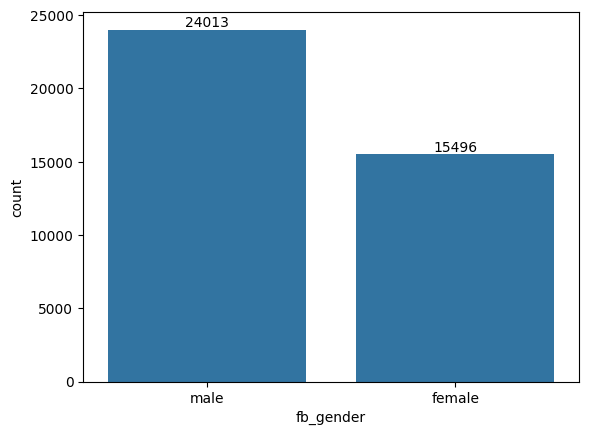

In [ ]:
ax = sns.countplot(x='fb_gender', data=df_final)
ax.bar_label(ax.containers[0])

plt.show()

* Male Count is Higher: The bar chart shows that the count of gender males in FB (24,013) is higher than the count of gender females in FB (15,496).

* Distribution of Gender:

  * The distribution shows that there are significantly more males than females in the dataset.

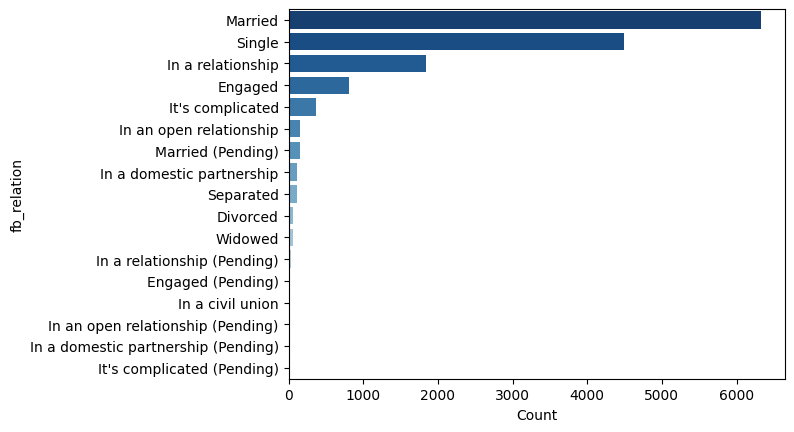

In [ ]:
value_counts = df_final['fb_relation'].value_counts()

sns.barplot(x=value_counts.values, y=value_counts.index, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("fb_relation")
plt.show()

* "Married" is the **Most Common Status in FB**: The majority of individuals fall under the "Married" category.

* "Single" and "In a Relationship" in FB: These are also **common statuses**, but with fewer individuals compared to "Married."

* Less Common Statuses in FB: Relationship statuses like "It's complicated (Pending)" and "In a domestic partnership (Pending)" have very few individuals.

#### Analysis of Data Similarities between User Self Reported Data and Facebook Profile
We will analyze typical users based on the **similarities between the data reported and the data on their Facebook profile**. In this case it will be looked at based on **gender** since it's not common in Indonesia to change gender. We will see flag bad of user that **don't have same data** between self reported data and facebook profile

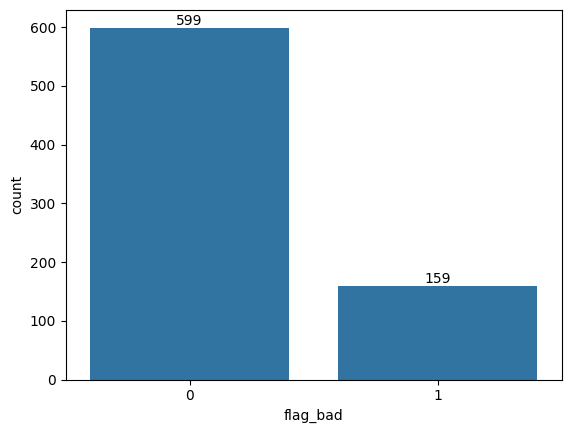

In [ ]:
# Different Gender
different_gender = df_final[((df_final['de_gender'] == 1) & (df_final['fb_gender'] == 'female')) | ((df_final['de_gender'] == 2) & (df_final['fb_gender'] == 'male'))]
different_gender['flag_bad'].value_counts()

ax = sns.countplot(x='flag_bad', data=different_gender)
ax.bar_label(ax.containers[0])

plt.show()

From the graph we can see, user that have different gender data in user reported data and facebook profile, **17.4% of them is bad user**. It is **higher** than percentage of bad user from all data.

We create a **new feature which is 'is_same_gender'** with value 0 if the user **has same gender** between the data reported and the data on their Facebook profile and 1 if otherwise

In [ ]:
df_final['is_same_gender'] = df_final.index.map(
    lambda idx: 1 if idx in different_gender.index and df_final.loc[idx, 'de_gender'] == different_gender.loc[idx, 'de_gender'] else 0
)
df_final['is_same_gender'].value_counts()

,count
is_same_gender,
0,40264
1,758


### EDA Numerical Variables

We ignore **'date'** columns because based on our **subjective assessment**, these columns have no effect on flag_bad

In [ ]:
numerical_columns.remove('fb_last_updated_date')
numerical_columns.remove('de_date_joined')
numerical_columns.remove('index')
numerical_columns

['ph_total_contacts',
 'de_age',
 'de_num_friends',
 'de_children',
 'de_employment_duration',
 'de_monthly_salary']

#### Histogram

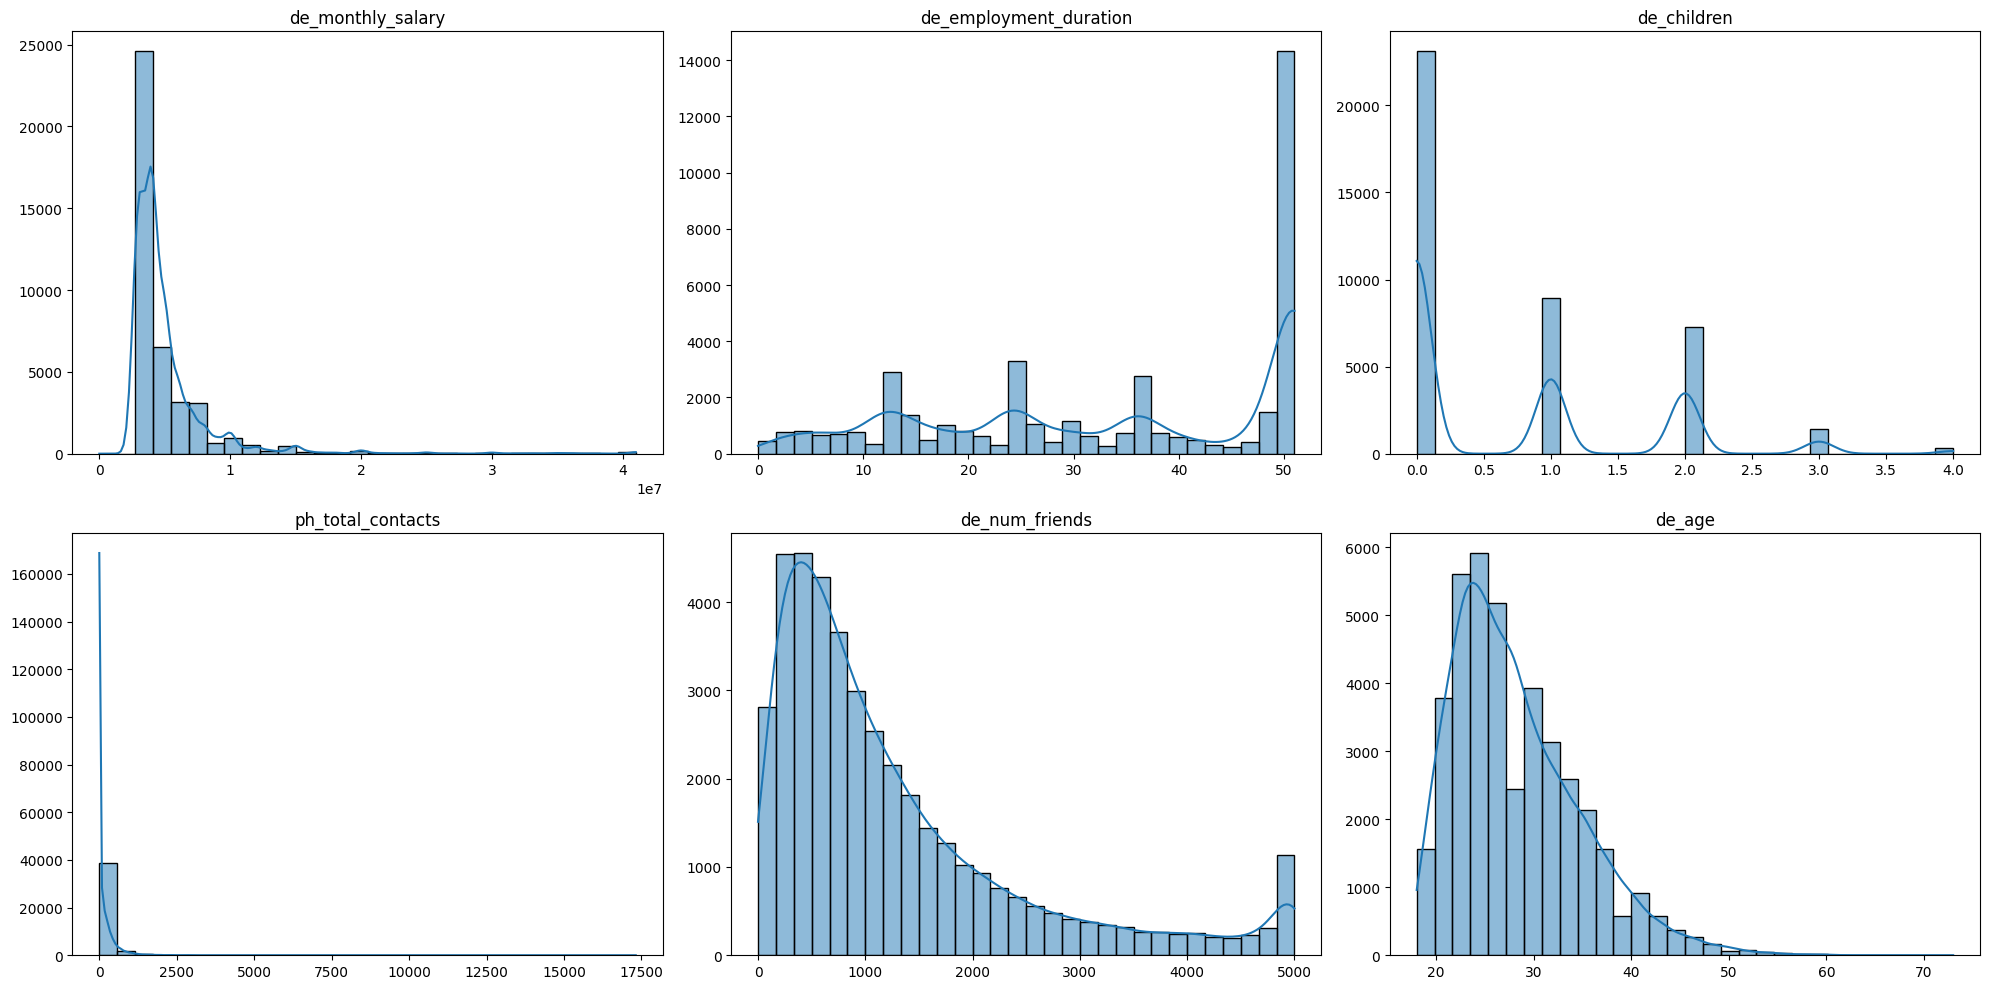

In [ ]:
# Set up the figure and axes for multiple subplots

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))  # 2 rows, 5 columns

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df_final[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

1. de_monthly_salary: The distribution is **highly right-skewed** with a **large concentration of values near zero**, indicating the presence of high outliers.

2. de_employment_duration: The distribution shows **periodic peaks** and a **significant spike at 50**, suggesting possible grouping or data collection artifacts.

3. ph_total_contacts: **Highly right-skewed with a large concentration of values near zero**. A noticeable **spike at a very low value**.
Presence of extreme outliers beyond 15,000.

4. de_num_friends:** Also right-skewed**, though not as extreme. A long tail with some high values around 5,000, indicating potential outliers.

5. de_age: **The distribution is right-skewed**, meaning most of the data points are concentrated toward the lower age range (around 20-35 years).
There are a few higher age values (above 50-60 years) that appear less frequently, which might be outliers.


#### Box Plot

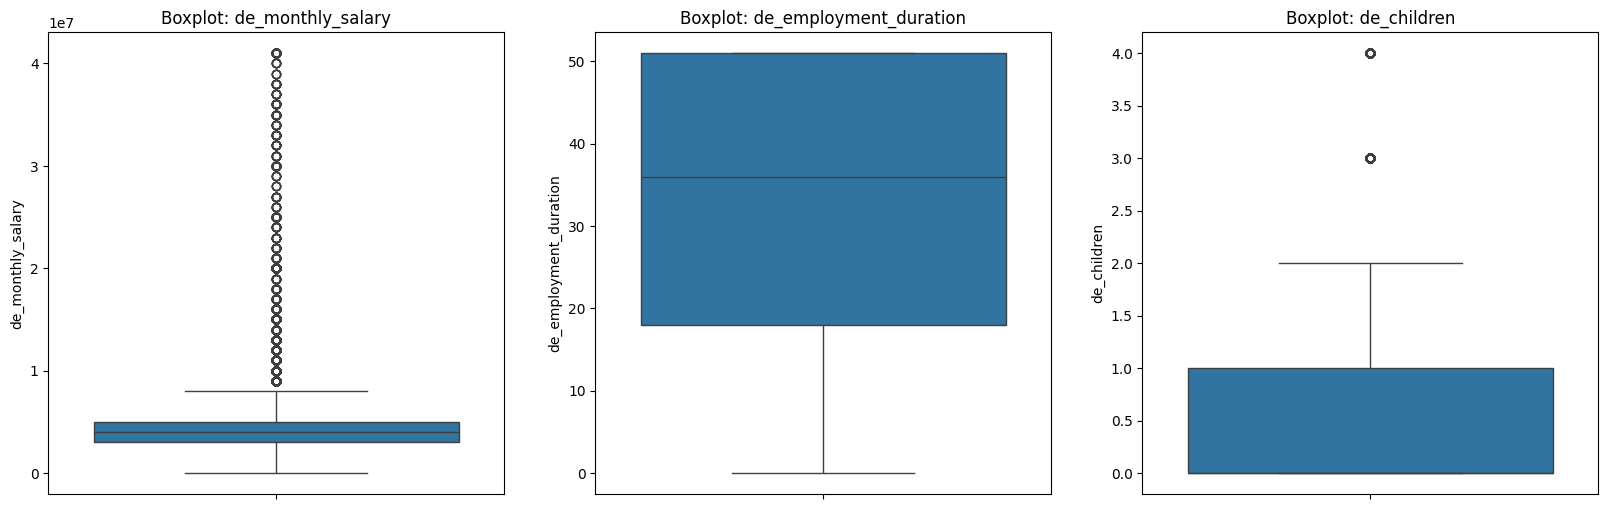

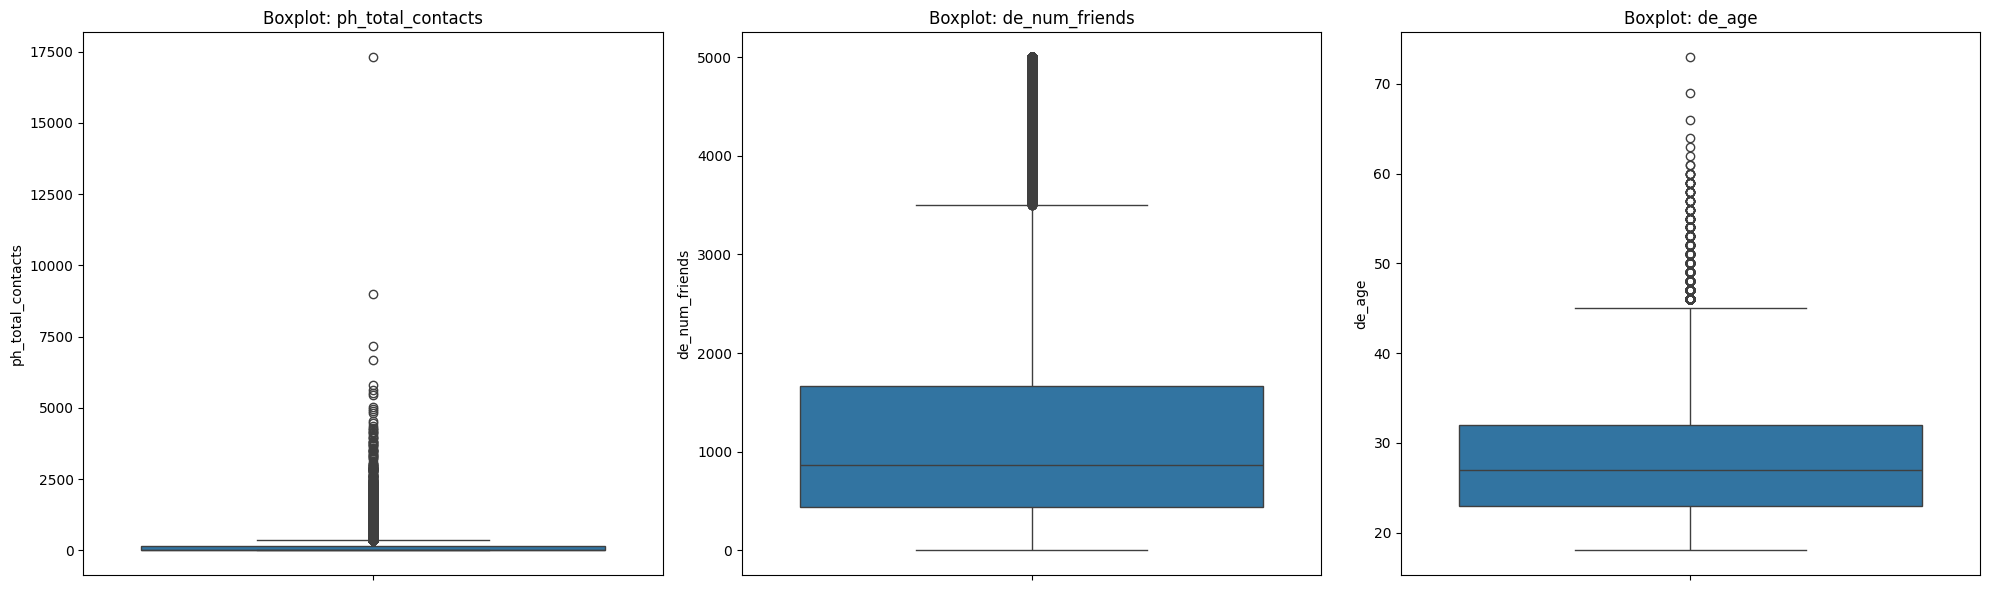

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))  # 1 row, 5 columns

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(numerical_columns[:3]):  # First 5 numerical columns
    sns.boxplot(y=df_final[col], ax=axes[i])
    axes[i].set_title(f"Boxplot: {col}")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))  # Another row for remaining 5 columns
axes = axes.flatten()

for i, col in enumerate(numerical_columns[3:]):  # Remaining 5 numerical columns
    sns.boxplot(y=df_final[col], ax=axes[i])
    axes[i].set_title(f"Boxplot: {col}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

1. de_monthly_salary: The presence of **many high outliers** suggests a wide range of salary values with a few very high earners.

2. de_employment_duration: The data is **more evenly distributed**, with a median duration around 40 and **no significant outliers**.

3. ph_total_contacts: The presence of **many high outliers** suggests a wide range of total contacts with a few individuals having significantly higher contact counts.

4. de_num_friends: The number of friends shows a **wider spread**, with several **high outliers** indicating individuals with a large number of friends.

5. de_age: The age distribution shows **most individuals are between 20 and 35** years old, with some outliers representing older ages.

#### Correlation Matrix

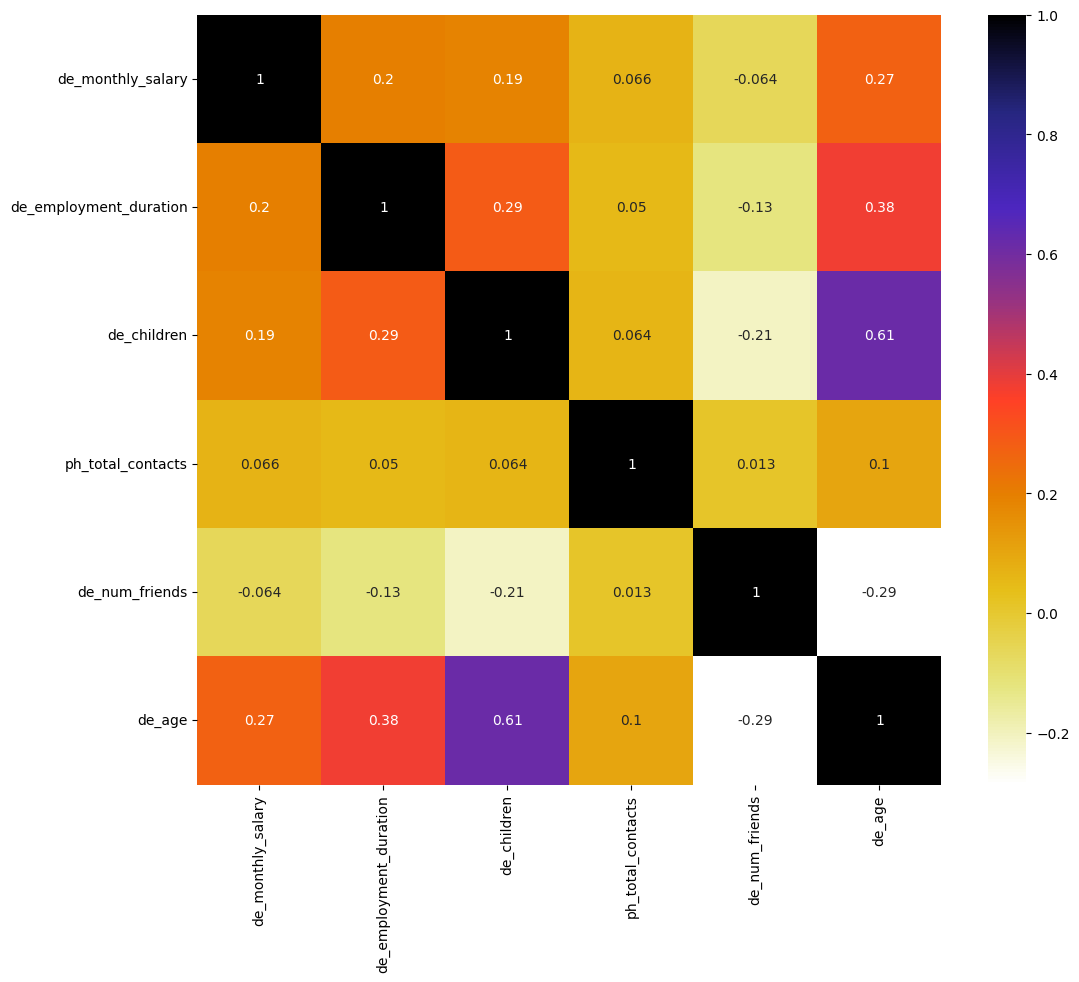

In [ ]:
numeric = df_final[numerical_columns]
cor = numeric.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

* Strongest Positive Correlations
  * de_age & de_children (0.61)
    * Older individuals **tend to have more** children.
  * de_age & de_employment_duration (0.38)
    * Older individuals **tend to have longer employment durations**.
  * de_monthly_salary & de_age (0.27)
    * Monthly **salary increases with age**, which is expected as work experience grows.

* Strongest Negative Correlations
  * de_age & de_num_friends (-0.29)
    * Older people **tend to have fewer friends** on the Facebook.
  * de_children & de_num_friends (-0.21)
    * People with more children **tend to have fewer friends**, possibly due to family commitments.
    
* Weak Correlations (Close to 0)
  * ph_total_contacts has low correlation with other variables.
    * This suggests phone contacts may **not be strongly related to salary, age, or social behavior**.
  * de_num_friends & ph_total_contacts (0.013)
    * Having many total phone contacts **does not strongly predict the number of social media friends**.

## Data Preparation

### Handling Outliers
We need to handle outliers for 'de_monthly_salary', 'ph_total_contacts', 'de_num_friends' and 'de_age'. We use Log Transformation and Yeo-Johnson Transformation to handle outliers since these algorithms are effective in handling high skewed distributions and has zero values. Then, we will compared those two methods.

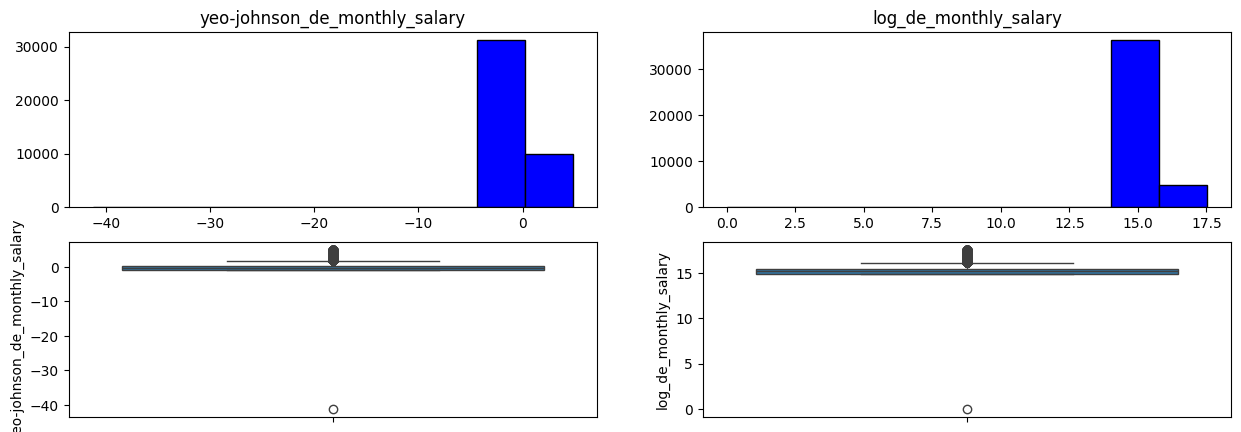

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

transformer = PowerTransformer(method='yeo-johnson')
df_final['yeo-johnson_de_monthly_salary'] = transformer.fit_transform(df_final[['de_monthly_salary']])
df_final['log_de_monthly_salary'] =  np.log1p(df_final['de_monthly_salary'])

axes[0,0].hist(df_final['yeo-johnson_de_monthly_salary'], bins=10, color='blue', edgecolor='black')
axes[0,0].set_title('yeo-johnson_de_monthly_salary')
axes[0,1].hist(df_final['log_de_monthly_salary'], bins=10, color='blue', edgecolor='black')
axes[0,1].set_title('log_de_monthly_salary')

sns.boxplot(y='yeo-johnson_de_monthly_salary', data=df_final, ax=axes[1,0])
sns.boxplot(y='log_de_monthly_salary', data=df_final,ax=axes[1,1])

plt.show()

We need extra outlier handling for column 'de_monthly_salary' because there is one very extreme value. We do this extra outlier handling with Winsorization method because we want to **cap extreme** values while keeping all data.

In [ ]:
lower_yeo = df_final['yeo-johnson_de_monthly_salary'].quantile(0.01)  # 1st percentile
upper_yeo = df_final['yeo-johnson_de_monthly_salary'].quantile(0.99)  # 99th percentile
df_final['yeo-johnson_de_monthly_salary'] = df_final['yeo-johnson_de_monthly_salary'].clip(lower=lower_yeo, upper=upper_yeo)

lower_log = df_final['log_de_monthly_salary'].quantile(0.01)  # 1st percentile
upper_log = df_final['log_de_monthly_salary'].quantile(0.99)  # 99th percentile
df_final['log_de_monthly_salary'] = df_final['log_de_monthly_salary'].clip(lower=lower_log, upper=upper_log)

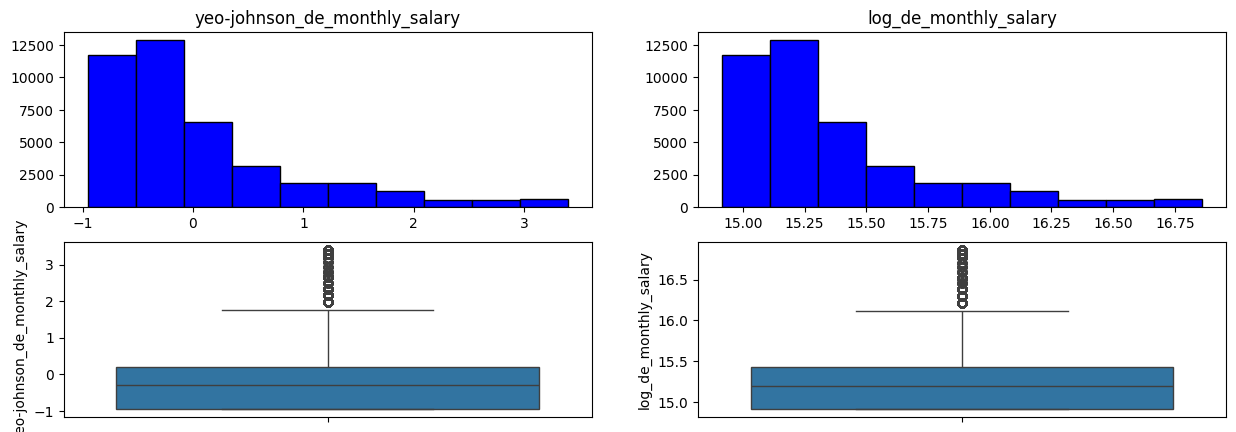

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

axes[0,0].hist(df_final['yeo-johnson_de_monthly_salary'], bins=10, color='blue', edgecolor='black')
axes[0,0].set_title('yeo-johnson_de_monthly_salary')
axes[0,1].hist(df_final['log_de_monthly_salary'], bins=10, color='blue', edgecolor='black')
axes[0,1].set_title('log_de_monthly_salary')

sns.boxplot(y='yeo-johnson_de_monthly_salary', data=df_final, ax=axes[1,0])
sns.boxplot(y='log_de_monthly_salary', data=df_final,ax=axes[1,1])

plt.show()

In [ ]:
joblib.dump(transformer, 'transformer_salary.pkl')

['transformer_salary.pkl']

**Almost there is no different** graph between Yeo-Johnson Transformation and Log Transformation. We choose **Yeo-Johnson** because this method usually perform better for Machine Learning task

<Axes: ylabel='log_ph_total_contacts'>

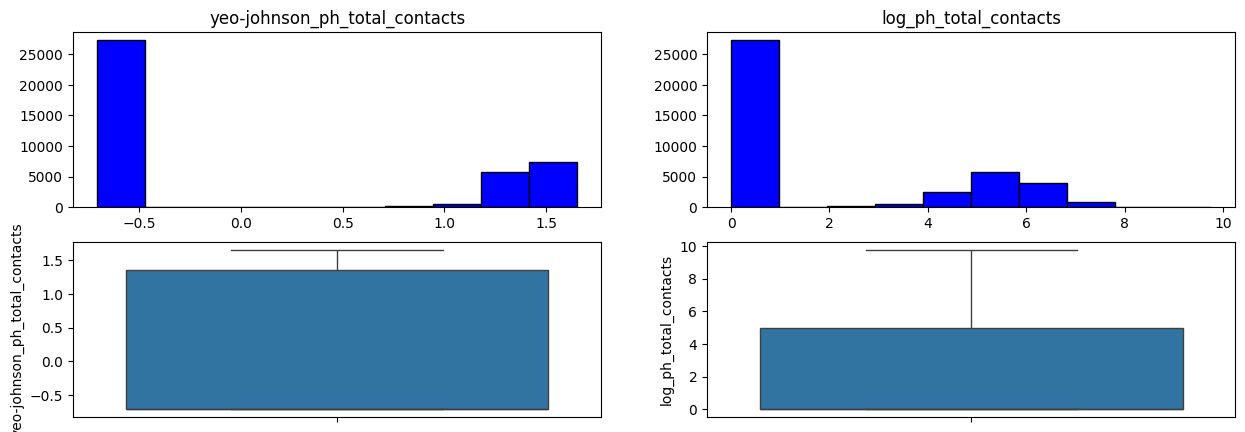

In [ ]:
df_final['yeo-johnson_ph_total_contacts'] = transformer.fit_transform(df_final[['ph_total_contacts']])
df_final['log_ph_total_contacts'] =  np.log1p(df_final['ph_total_contacts'])

fig, axes = plt.subplots(2, 2, figsize=(15, 5))

axes[0,0].hist(df_final['yeo-johnson_ph_total_contacts'], bins=10, color='blue', edgecolor='black')
axes[0,0].set_title('yeo-johnson_ph_total_contacts')
axes[0,1].hist(df_final['log_ph_total_contacts'], bins=10, color='blue', edgecolor='black')
axes[0,1].set_title('log_ph_total_contacts')

sns.boxplot(y='yeo-johnson_ph_total_contacts', data=df_final, ax=axes[1,0])
sns.boxplot(y='log_ph_total_contacts', data=df_final,ax=axes[1,1])

1. **Yeo-Johnson Transformation**
*   Histogram: Histogram is still highly skewed, meaning the transformation did not fully normalize the data.
*   Boxplot: Boxplot shows no extreme outliers, suggesting better outlier suppression.

2. **Log Transformation**
*   Histogram: The histogram is much more balanced, suggesting better normalization.
*   Boxplot: The boxplot shows some compression but retains variability.

We choose **Log Transformation** since it better normalizes the data, reducing skewness and although outliers are still visible but less extreme.

<Axes: ylabel='log_de_num_friends'>

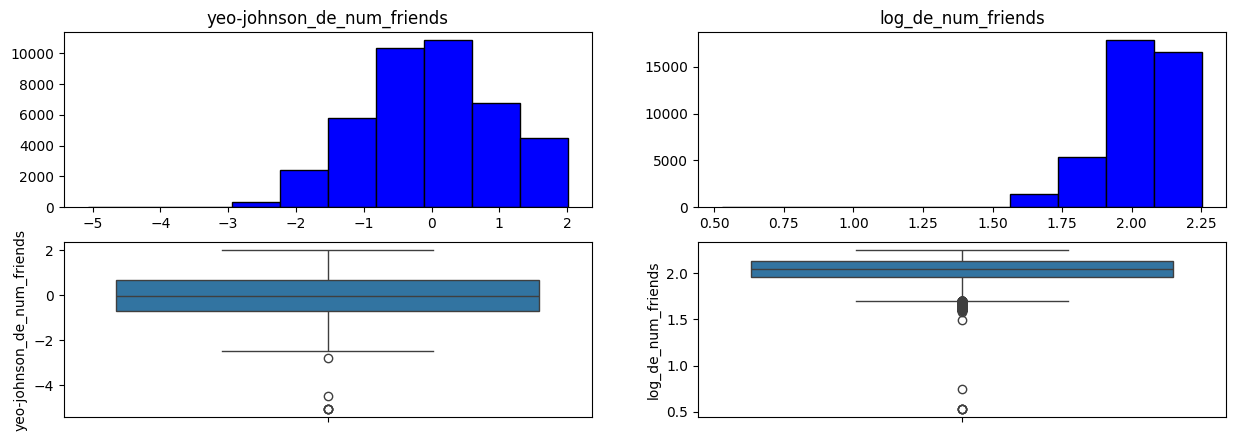

In [ ]:
df_final['yeo-johnson_de_num_friends'] = transformer.fit_transform(df_final[['de_num_friends']])

min_value = df_final['de_num_friends'].min()
if min_value < 0:
    df_final['de_num_friends'] = df_final['de_num_friends'] - min_value + 1

df_final['de_num_friends'] = np.log1p(df_final['de_num_friends'])
df_final['log_de_num_friends'] =  np.log1p(df_final['de_num_friends'])

fig, axes = plt.subplots(2, 2, figsize=(15, 5))

axes[0,0].hist(df_final['yeo-johnson_de_num_friends'], bins=10, color='blue', edgecolor='black')
axes[0,0].set_title('yeo-johnson_de_num_friends')
axes[0,1].hist(df_final['log_de_num_friends'], bins=10, color='blue', edgecolor='black')
axes[0,1].set_title('log_de_num_friends')

sns.boxplot(y='yeo-johnson_de_num_friends', data=df_final, ax=axes[1,0])
sns.boxplot(y='log_de_num_friends', data=df_final,ax=axes[1,1])

In [ ]:
joblib.dump(transformer, 'transformer_friend.pkl')

['transformer_friend.pkl']

1. Yeo-Johnson Transformation:

  * Histogram: The data appears to be roughly normally distributed, centered around 0.

  * Box Plot: Shows the spread and outliers of the transformed data. The box plot indicates that there are a few outliers present, as shown by the circles below the lower whisker.

2. Log Transformation:

  * Histogram: The data is skewed to the right, with a concentration of values around 1.1.

  * Box Plot: Shows the spread and outliers of the transformed data. The box plot indicates that there are several outliers present, as shown by the circles below the lower whisker.

We choose **Yeo-Johnson** since the Yeo-Johnson transformation appears to **handle outliers better as it produces a more normally distributed dataset** with fewer outliers. This transformation method may provide more reliable results for further statistical analyses and modeling.

<Axes: ylabel='log_de_age'>

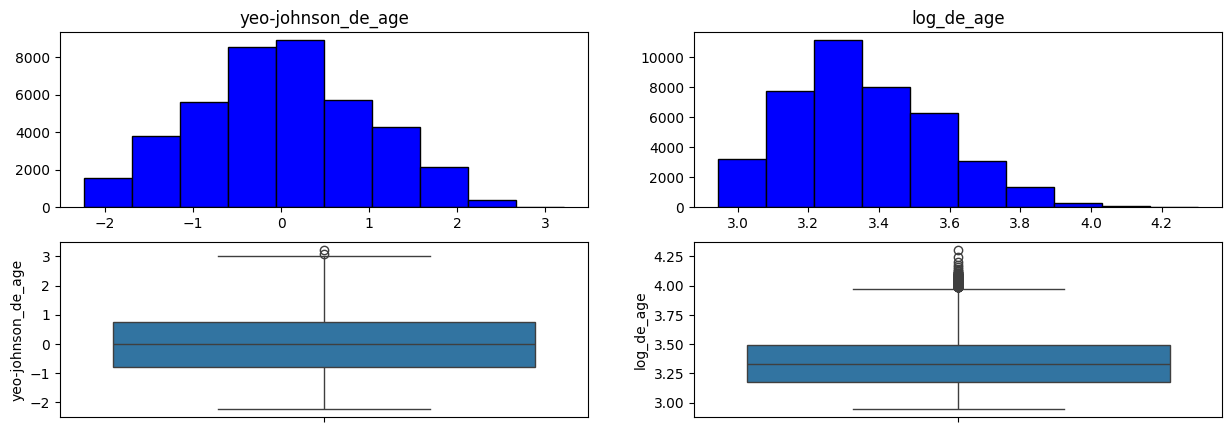

In [ ]:
df_final['yeo-johnson_de_age'] = transformer.fit_transform(df_final[['de_age']])
df_final['log_de_age'] =  np.log1p(df_final['de_age'])

fig, axes = plt.subplots(2, 2, figsize=(15, 5))

axes[0,0].hist(df_final['yeo-johnson_de_age'], bins=10, color='blue', edgecolor='black')
axes[0,0].set_title('yeo-johnson_de_age')
axes[0,1].hist(df_final['log_de_age'], bins=10, color='blue', edgecolor='black')
axes[0,1].set_title('log_de_age')

sns.boxplot(y='yeo-johnson_de_age', data=df_final, ax=axes[1,0])
sns.boxplot(y='log_de_age', data=df_final,ax=axes[1,1])

In [ ]:
joblib.dump(transformer, 'transformer_age.pkl')

['transformer_age.pkl']

1. Yeo-Johnson Transformation:

  * Results in a more symmetric distribution.

  * Fewer outliers compared to the logarithmic transformation.

2. Logarithmic Transformation:

  * Results in a skewed distribution.

  * More outliers compared to the Yeo-Johnson transformation.

We choose **Yeo-Johnson** since the Yeo-Johnson transformation appears to **handle outliers better as it produces a more normally distributed dataset** with fewer outliers. This transformation method may provide more reliable results for further statistical analyses and modeling.

### Handling Missing Values
Because the missing values in the 'fb_relation' column are **more than 50%** of the data, we do not use that column. So the columns we will handle missing values juts 'fb_gender' becaues based on our **subjective assessment**, 'ph_call_log_stats' has no effect on flag_bad

We use **mode imputation** to handle missing values for column 'fb_gender' because missing values are random and low

In [ ]:
df_final['fb_gender'].fillna(df_final['fb_gender'].mode()[0], inplace=True)
df_final['fb_gender'].value_counts()

,count
fb_gender,
male,25526
female,15496


### Encoding


We will encode columns **'ph_other_device_info' and 'fb_gender'**. For column 'fb_gender' we use same encoding with column 'de_gender'. For column 'ph_other_device_info' we will **extract information** inside that column before do encoding. For standarization, we **lowercase** text in device codename and brand

In [ ]:
import json

# Convert JSON column to dictionary
df_final['ph_other_device_info'] = df_final['ph_other_device_info'].apply(json.loads)

# Extract keys into new columns
df_final_new = pd.concat([df_final, df_final['ph_other_device_info'].apply(pd.Series)], axis=1)

In [ ]:
df_final_new['device_codename'] = df_final_new['device_codename'].str.lower()
df_final_new['brand'] = df_final_new['brand'].str.lower()
display(df_final_new['device_codename'].value_counts())
display(df_final_new['brand'].value_counts())

,count
device_codename,
mido,1879
santoni,1832
a1601,1628
rolex,1536
a37f,1413
...,...
evercoss a7b,1
d2212,1
j23g,1


,count
brand,
xiaomi,13764
samsung,8871
oppo,7474
vivo,2460
asus,2425
...,...
kyocera,1
qcom,1
vodafone,1


We will do **Frequency Encoding** for **'device_codename'** and **'brand'** since there are 1041 and 133 categories in the columns and the column also is nominal data type

In [ ]:
# Label Encoding
gender_mapping = {'male': 1, 'female': 2}
df_final_new['fb_gender_encoded'] = df_final_new['fb_gender'].map(gender_mapping)

# Frequency Encoding
device_freq = df_final_new['device_codename'].value_counts(normalize=True)
df_final_new['device_codename_encoded'] = df_final_new['device_codename'].map(device_freq)

brand_freq = df_final_new['brand'].value_counts(normalize=True)
df_final_new['brand_encoded'] = df_final_new['brand'].map(brand_freq)

df_final_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41022 entries, 0 to 41021
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          41022 non-null  int64  
 1   flag_bad                       41022 non-null  int64  
 2   de_age                         41022 non-null  int64  
 3   de_gender                      41022 non-null  int64  
 4   de_date_joined                 41022 non-null  object 
 5   de_num_friends                 41022 non-null  float64
 6   de_monthly_salary              41022 non-null  int64  
 7   de_employment_type             41022 non-null  int64  
 8   de_employment_duration         41022 non-null  int64  
 9   de_accomodation_type           41022 non-null  int64  
 10  de_education                   41022 non-null  int64  
 11  de_marital_status              41022 non-null  int64  
 12  de_children                    41022 non-null 

### Scaling
We use the **Robust Scaler** since the dataset contains outliers and has a non-Gaussian distribution

In [ ]:
scaler = RobustScaler()
columns_to_scale = ['log_ph_total_contacts','yeo-johnson_de_age','yeo-johnson_de_num_friends','de_children','de_employment_duration','yeo-johnson_de_monthly_salary']
df_final_new[columns_to_scale] = scaler.fit_transform(df_final_new[columns_to_scale])

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
df_final_new.to_csv('dataset_final.csv', index=False)

## Modeling

### Feature Selection (Backward Elimination)

We will perform feature selection to identify and retain the most relevant features that contribute significantly to predicting the target variable. This step ensures we reduce noise, enhance model performance, and improve interpretability.

In our analysis, we employ the backward elimination method to select the most relevant features for our model. Backward elimination is an iterative process that begins with all potential features and removes the least significant feature in each iteration. This process continues until the optimal set of features is identified, based on the model's performance.

In [ ]:
columns_to_used = ['log_ph_total_contacts','yeo-johnson_de_age','yeo-johnson_de_num_friends','de_children','de_employment_duration',
                   'yeo-johnson_de_monthly_salary','flag_bad','de_gender','de_employment_type','de_education','de_marital_status','is_same_gender',
                   'fb_gender_encoded','device_codename_encoded','brand_encoded']

data_used = df_final_new[columns_to_used]

X = data_used.drop(columns=['flag_bad'])
y = data_used['flag_bad']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

We used ROC-AUC as metric score because its **binary class problems** and dataset has **unequal class distributions** in variable target

In [ ]:
tree_model = RandomForestClassifier(n_estimators=300, random_state=42,class_weight='balanced')
def backward_elimination(X, y, model, cv=5):
    features = list(X.columns)
    best_features = []
    optimal_scores = 0
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    while len(features) > 1:
        model.fit(X[features], y)
        # Evaluate model with cross-validation

        scores = cross_val_score(model, X[features], y, cv=cv, scoring='roc_auc')
        print(f"Features: {features}")
        print(f"CV Score: {np.mean(scores):.4f}")

        # Feature importances
        importances = model.feature_importances_
        least_important = features[np.argmin(importances)]
        print(f"Removing least important feature: {least_important}\n")

        if scores.mean() > optimal_scores:
            optimal_scores = scores.mean()
            best_features = features.copy()

        # Remove the least important feature
        features.remove(least_important)

    print(f"Best selected feature(s): {best_features}")
    return best_features

selected_features_be = backward_elimination(X_train, y_train, tree_model)
print("Selected Features (Backward):", selected_features_be)

Features: ['log_ph_total_contacts', 'yeo-johnson_de_age', 'yeo-johnson_de_num_friends', 'de_children', 'de_employment_duration', 'yeo-johnson_de_monthly_salary', 'de_gender', 'de_employment_type', 'de_education', 'de_marital_status', 'is_same_gender', 'fb_gender_encoded', 'device_codename_encoded', 'brand_encoded']
CV Score: 0.6302
Removing least important feature: is_same_gender

Features: ['log_ph_total_contacts', 'yeo-johnson_de_age', 'yeo-johnson_de_num_friends', 'de_children', 'de_employment_duration', 'yeo-johnson_de_monthly_salary', 'de_gender', 'de_employment_type', 'de_education', 'de_marital_status', 'fb_gender_encoded', 'device_codename_encoded', 'brand_encoded']
CV Score: 0.6293
Removing least important feature: fb_gender_encoded

Features: ['log_ph_total_contacts', 'yeo-johnson_de_age', 'yeo-johnson_de_num_friends', 'de_children', 'de_employment_duration', 'yeo-johnson_de_monthly_salary', 'de_gender', 'de_employment_type', 'de_education', 'de_marital_status', 'device_coden

Final Selected Feature(s): ['yeo-johnson_de_num_friends']

The final iteration of the backward elimination process identifies **number of friends** as the most significant feature contributing to the model's performance. This indicates that the number of friends has a strong influence on the target variable (flag bad).

The backward elimination process effectively narrows down the features to those most impactful in predicting **flag bad**. The identified features span various aspects of the user data, including age, number of childre, number of friends, maritas status and device codename.

By focusing on these selected features, we can build a more efficient and accurate predictive mode.

### Hyperparameter Tuning

We will experiment with Random Forest, XGBoost, LightGBM and SVC since those algorithm robust to overfitting, good for imbalanced and high-dimensional dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Define Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models and hyperparameter grids
models = {
    "XGBoost": {
        "model": XGBClassifier(random_state=42),
        "params": {
            "n_estimators": [300, 400],
            "max_depth": [3, 6],
            "learning_rate": [0.01, 0.1]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [300,400],
            "max_depth": [None, 10],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],

        }
    },
    "LGBM": {
        "model": LGBMClassifier(random_state=42),
        "params": {
            "n_estimators": [300, 400],
            "num_leaves": [31, 50],
            "max_depth": [None, 10],
            "learning_rate": [0.01, 0.1]
        }
    }
}

# Perform Grid Search for each model
best_models = {}

for name, config in models.items():
    print(f"\n Running Grid Search for {name}...\n")

    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        scoring="roc_auc",
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    best_models[name] = {
        "best_estimator": grid_search.best_estimator_,
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_
    }

    print(f"Best ROC-AUC Score for {name}: {grid_search.best_score_:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}\n")

# Evaluate best models on test data
print("\n Evaluating Best Models on Test Set...\n")
for name, result in best_models.items():
    model = result["best_estimator"]
    y_probs = model.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, y_probs)
    print(f"{name} Test ROC-AUC Score: {test_auc:.4f}")

# Identify best overall model
best_model_name, best_model_info = max(best_models.items(), key=lambda x: x[1]["best_score"])
best_model = best_model_info["best_estimator"]

print(f"\n Best Overall Model: {best_model_name} with ROC-AUC: {best_model_info['best_score']:.4f}")
print(f"Best Parameters: {best_model_info['best_params']}")

# Save the best model
model_filename = f"best_model_{best_model_name}.pkl"
joblib.dump(best_model, model_filename)
print(f"\n Best model saved as: {model_filename}")



 Running Grid Search for XGBoost...

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best ROC-AUC Score for XGBoost: 0.6695
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}


 Running Grid Search for RandomForest...

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best ROC-AUC Score for RandomForest: 0.6497
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


 Running Grid Search for LGBM...

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 4256, number of negative: 28561
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 32817, number of used features: 14
[LightGBM] [Inf

#### **Insight of Training**

1. **Overall Performance**
  * The **best model** based on **cross-validation (CV) ROC-AUC** score is **XGBoost** with a CV score of **0.6695**.
  * On the **test set**, XGBoost achieved a **ROC-AUC of 0.6816**, which is slightly **higher than** its cross-validation score. This indicates that the model is **generalizing well and is not overfitting**.
  * **RandomForest** performed the worst among the three models, with a CV **ROC-AUC of 0.6497** and a test **ROC-AUC of 0.6612**.
  * **LGBM** performed **slightly worse** than XGBoost, with a **CV ROC-AUC of 0.6595** and a **test ROC-AUC of 0.6737**

2. **XGBoost vs. LGBM vs. Random Forest**

  * **XGBoost Insights**

    * **Best performing model** with the highest test **ROC-AUC of 0.6816**.
    * The chosen hyperparameters (max_depth=3, learning_rate=0.1, n_estimators=400) indicate a **shallow tree with gradual learning**.
    * The **CV ROC-AUC (0.6695) is slightly lower than the test ROC-AUC (0.6816)**, which suggests that the model **generalizes well** and is not overfitting.

  * **LGBM Insights**

    * Close second with **ROC-AUC of 0.6737** on the test set.
    * Used a **lower learning rate (0.01)**, which means **slower but more stable learning**.
    * A **higher max depth (10)** allows for more complex decision boundaries.
    * A good alternative if XGBoost is computationally expensive.

  * **Random Forest Insights**

    * **Lowest performance**, with **ROC-AUC of 0.6612** on the test set.
    * The best hyperparameters include **shallower trees (max_depth=10)** and **more estimators (400)**.
    * **Tends to struggle with tabular data when compared** to boosting methods like XGBoost and LGBM.

3. **Room for Improvement**
  * **Feature Engineering**

    * Check for **feature importance** from XGBoost (model.feature_importances_) to see if some features are irrelevant.
    * Try **creating new features** (e.g., polynomial features, interactions, domain-specific transformations).

  * Handling Class Imbalance (if applicable)

    * If your dataset is **imbalanced**, try **SMOTE (Synthetic Minority Over-sampling Technique)** or **class-weight adjustments**.

  * Hyperparameter Tuning

    * Try **more hyperparameter** for tuning.

  * Try Ensemble Learning

    * **Combine XGBoost and LGBM** into an ensemble model (e.g., Voting Classifier or Stacking).




### Feature Importance

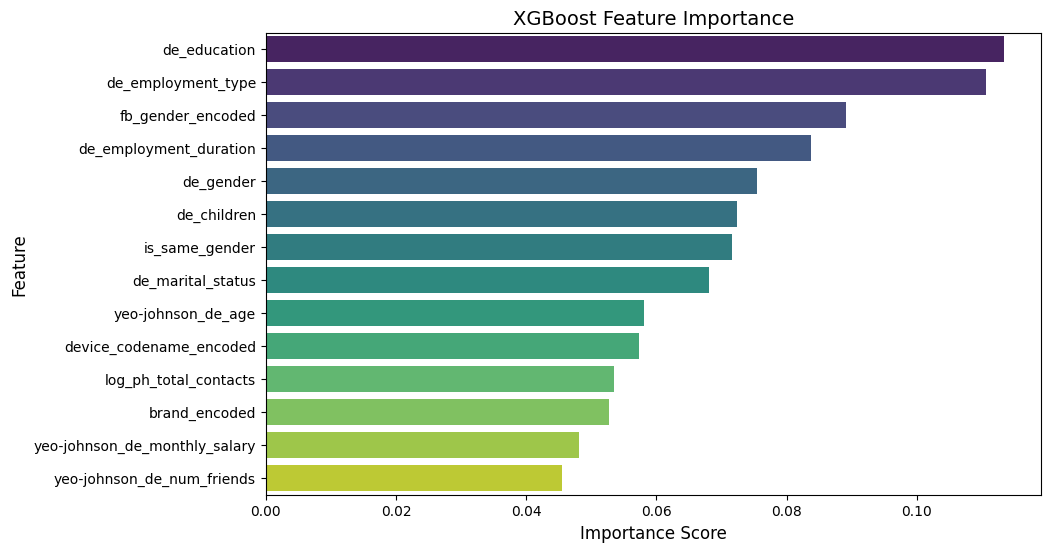

In [ ]:
feature_importance = best_model.feature_importances_

# Create DataFrame for visualization
feature_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)


# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
plt.title("XGBoost Feature Importance", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


The most influential features (highest importance scores) are:
1. de_education: The most important feature, suggesting that **education level plays a major role** to classify bad user.
2. de_employment_type: Employment type is also **highly significant**, which makes sense because the model predict behavior of user.
3. fb_gender_encoded: **Social media gender classification contributes significantly**, hinting at possible behavioral patterns.
4. de_employment_duration: **The length of employment is an important predictor**, indicating that stability in employment matters.

These features have the highest impact on the model's predictions.

**Key Takeaways**

1. Employment & Education are the biggest predictors: These should be explored further, possibly with interaction effects.
2. Gender, Marital Status & Social Factors matter: But they are secondary predictors compared to financial and employment-related features.
3. Device and Contact-based features are less relevant: Might be useful in specific contexts but not primary drivers.
4. Feature Engineering Opportunities: Further transformation or combination of top features (e.g., "employment duration x education") might enhance model performance.


## Summary

1. Data Understanding is an **important part of getting insight** from data so that we can carry out **better data processing** at the next stage
2. There is **no perfect method** of handling outliers or handling missing values so we have to experiment it also with some methods
3. **XGBoost** is the best model, but the performance is still not very high (ROC-AUC 0.6816). While LGBM is a **close second** and might be worth further tuning.
4. **Further improvements** can be made through **feature engineering, handling class imbalance, and advanced hyperparameter tuning**.
5. The most important feature is **de_education** suggesting that **education level plays a major role** to classify bad user.
6. We also make the **webapp** to test the model. You can access it using the following link: [webapp](https://user-classification-chatbot-financial.streamlit.app/)